In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [16]:
# 1.生成样本集
def generate(sample_size, mean, cov, diff, regression):
    num_classes = 2
    samples_per_class = int(sample_size/2)
    
    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
        
        X0 = np.concatenate((X0, X1))
        Y0 = np.concatenate((Y0, Y1))
    
    if regression == False:     # one-hot编码，将0转成1 0 
        class_ind = [Y==class_number for class_number in range(num_classes)]
        # 将输入转换为数组
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    # 以一致的方式洗牌数组或稀疏矩阵
    X, Y = shuffle(X0, Y0)
    return X,Y

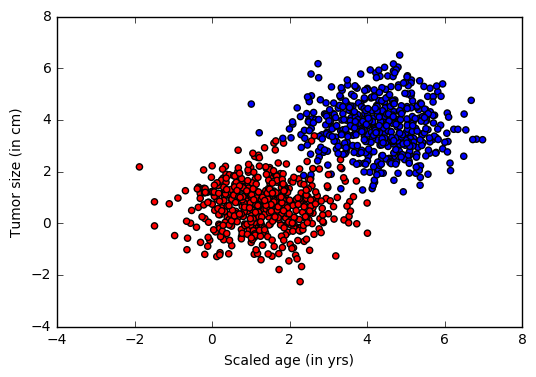

In [17]:
# 调用generate函数生成1000个数据，并将它们图示化
input_dim = 2   
np.random.seed(10)
num_classes = 2
mean = np.random.randn(num_classes)
cov = np.eye(num_classes)
X, Y = generate(1000, mean, cov, [3.0], True)
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()
lab_dim = 1

In [18]:
# 2.构建网络结构
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])
# 定义学习参数
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")

output = tf.nn.sigmoid(tf.matmul(input_features, W) + b)
cross_entropy = -(input_labels * tf.log(output) + (1 - input_labels) * tf.log(1 - output))
ser = tf.square(input_labels - output)
loss = tf.reduce_mean(cross_entropy)
err = tf.reduce_mean(ser)
# 尽量用这个，因其收敛快，会动态调节梯度
optimizer = tf.train.AdamOptimizer(0.04)
train = optimizer.minimize(loss)

Epoch: 0001 cost= 0.411503792 err= 0.25989006347954274
Epoch: 0002 cost= 0.218470454 err= 0.10321567906066775
Epoch: 0003 cost= 0.156649113 err= 0.05327814924530685
Epoch: 0004 cost= 0.126547188 err= 0.03769235401414335
Epoch: 0005 cost= 0.107644923 err= 0.03025717947166413
Epoch: 0006 cost= 0.094454855 err= 0.02583188157295808
Epoch: 0007 cost= 0.084684379 err= 0.022906621266156436
Epoch: 0008 cost= 0.077138864 err= 0.020846160041401163
Epoch: 0009 cost= 0.071124628 err= 0.019328569108620287
Epoch: 0010 cost= 0.066209681 err= 0.018172224884619937
Epoch: 0011 cost= 0.062110707 err= 0.01726703647291288
Epoch: 0012 cost= 0.058633808 err= 0.016542655587545595
Epoch: 0013 cost= 0.055642344 err= 0.015952231068513355
Epoch: 0014 cost= 0.053037237 err= 0.015463485199143178
Epoch: 0015 cost= 0.050744567 err= 0.015053510348661803
Epoch: 0016 cost= 0.048708696 err= 0.014705669760587625
Epoch: 0017 cost= 0.046886388 err= 0.014407588068570476
Epoch: 0018 cost= 0.045243856 err= 0.014149910601554438

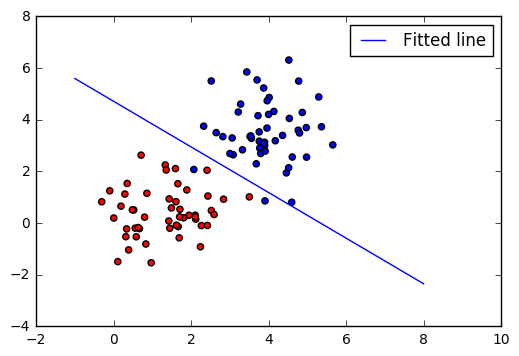

In [26]:
# 3.设置参数进行训练
maxEpochs = 50
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize],[-1,1])
            tf.reshape(y1,[-1,1])
            _,lossval, outputval,errval = sess.run([train,loss,output,err], feed_dict={input_features: x1, input_labels:y1})
            sumerr =sumerr+errval

        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",sumerr/np.int32(len(Y)/minibatchSize))
    
    
# 4.数据可视化
    train_X, train_Y = generate(100, mean, cov, [3.0],True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    # plt.scatter(train_X[:, 0], train_X[:, 1], c=train_Y)
    # plt.colorbar()
    
    # x1w1+x2*w2+b=0
    # x2=-x1* w1/w2-b/w2
    x = np.linspace(-1,8,200) 
    y=-x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x,y, label='Fitted line')
    plt.legend()
    plt.show() 